In [1]:
import os

In [2]:
%pwd

'c:\\Users\\Asus\\vs_code\\brain_tumor_Unet\\notebook'

In [3]:
os.chdir("../")

In [4]:
%pwd

'c:\\Users\\Asus\\vs_code\\brain_tumor_Unet'

In [17]:
import numpy as np
from pathlib import Path
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
from src.brain_tumor.utils.loss_functions import *

In [66]:
image_path = os.path.join('artifacts','datas','image','TCGA_DU_7010_19860307_39.tif')
mask_path  = os.path.join('artifacts','datas','mask','TCGA_DU_7010_19860307_39_mask.tif')
model_path = os.path.join('artifacts','training','model.h5')

In [7]:
trained_model = load_model(filepath=model_path,
                            custom_objects={'dice_coefficient_loss' : dice_coefficient_loss,
                                            'iou'                   : iou,
                                            'dice_coefficient'      : dice_coefficient})    
                        

In [21]:
from src.brain_tumor.utils.data_processing import load_image
import cv2

In [117]:
class PredictionPipeline:
    def __init__(self,filename):
        self.filename =filename

    
    def predict(self):
        model_path      = os.path.join('artifacts','training','model.h5')
        trained_model   = load_model(filepath=model_path,
                                        custom_objects={'dice_coefficient_loss' : dice_coefficient_loss,
                                                        'iou'                   : iou,
                                                        'dice_coefficient'      : dice_coefficient})    
        img             = load_image(image_path)
        ex_img          = tf.expand_dims(img,axis=0)
        pred            = trained_model.predict(ex_img)
        pred            = tf.squeeze(pred,axis=0).numpy()
        return [{'image'    : pred  }]

In [119]:
prediction = PredictionPipeline(filename='TCGA_DU_7010_19860307_39.tif')


In [120]:
pred = prediction.predict()

1/1 [==============================] - 0s 200ms/step


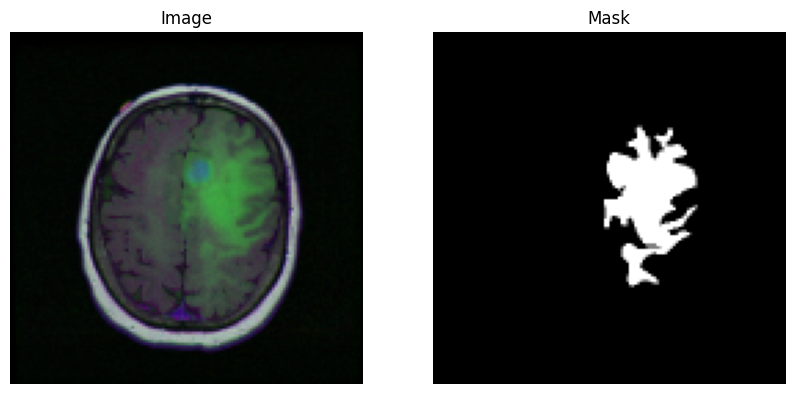

In [69]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

img  = load_image(image_path)
mask = load_image(mask_path)

axs[0].imshow(img, cmap='gray')
axs[0].set_title('Image')
axs[0].axis('off')

# Plot the mask in the second subplot
axs[1].imshow(mask, cmap='binary')
axs[1].set_title('Mask')
axs[1].axis('off')
plt.show()

In [80]:
trained_model.output

<KerasTensor: shape=(None, 128, 128, 1) dtype=float32 (created by layer 'conv2d_18')>

In [83]:
ex_img = tf.expand_dims(img,axis=0)

In [86]:
pred = trained_model.predict(ex_img)

1/1 [==============================] - 0s 26ms/step


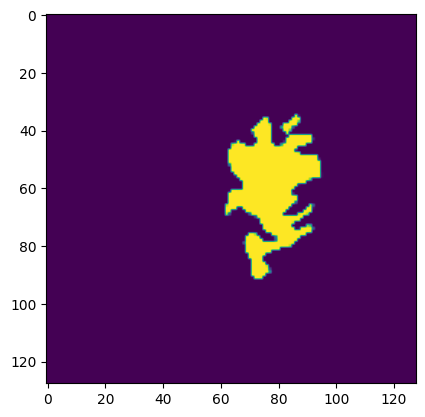

In [92]:
plt.imshow(tf.squeeze(pred,axis=0).numpy())

In [121]:
from src.brain_tumor.utils.common import decodeImage